In [1]:
import pandas as pd
import sys
if not sys.warnoptions:
    import warnings
    warnings.simplefilter("ignore")
from sklearn.preprocessing import LabelEncoder
from sklearn.impute import KNNImputer
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OneHotEncoder
from efficient_apriori import apriori
import numpy as np
from sklearn.cluster import AgglomerativeClustering, KMeans 
from sklearn.manifold import TSNE 
import matplotlib.pyplot as plt
from scipy.cluster.hierarchy import dendrogram 
from sklearn.preprocessing import StandardScaler 
from sklearn.metrics import silhouette_score 
from clustergram import Clustergram 
import urbangrammar_graphics as ugg 
import seaborn as sns

In [2]:
df = pd.read_excel('input_data-2.xlsx')

In [3]:
df

,contract_num,product_name,contract_status,currency_name,duration,country,age,sex,price,insurance_amount,loss_payout_amt,price_usd,insurance_amount_usd,loss_payout_amt_usd,anomaly
0,ТТЕ7227715*****,Страхование путешественников,Действует,Российский рубль,10,Беларусь,20,M,1096,2000000,0,12.41768,22660.000080,0.0,1
1,ТТЕ7227715*****,Страхование путешественников,Действует,Российский рубль,7,Индонезия,55,M,1918,5000000,0,21.73094,56650.000199,0.0,-1
2,БАДАМСТЕ55*****,Страхование путешественников,Действует,Российский рубль,10,Беларусь,61,F,1096,2000000,0,12.41768,22660.000080,0.0,-1
3,ТТЕ7227715*****,Страхование путешественников,Действует,Российский рубль,14,Грузия,25,M,1534,2000000,0,17.38022,22660.000080,0.0,1
4,ТТЕ7227715*****,Страхование путешественников,Действует,Российский рубль,7,Аргентина,33,M,1918,5000000,0,21.73094,56650.000199,0.0,-1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3706,ДСЖ-5/1539*****,Страхование путешественников,Действует,Российский рубль,15,Турция,22,F,2466,3000000,0,27.93978,33990.000119,0.0,-1
3707,ТТЕ7227778*****,Страхование путешественников,Действует,Российский рубль,7,Индонезия,33,M,1918,5000000,0,21.73094,56650.000199,0.0,-1
3708,БТАСЕ275 -*****,Страхование путешественников,Действует,Российский рубль,15,Турция,43,M,2466,3000000,0,27.93978,33990.000119,0.0,1
3709,ТТЕ7227778*****,Страхование путешественников,Действует,Российский рубль,30,Турция,29,M,4932,3000000,0,55.87956,33990.000119,0.0,1


In [4]:
df['anomaly'].values

array([ 1, -1, -1, ...,  1,  1,  1])

In [5]:
df_categorial = df[['product_name','contract_status','currency_name','country','sex','contract_num']]
df_numeric = df[['duration','age','price','insurance_amount','loss_payout_amt','price_usd','insurance_amount_usd','loss_payout_amt_usd','anomaly']]

In [6]:
sc = StandardScaler()
dfsc = sc.fit_transform(df_numeric)

In [7]:
std_scaler_data = sc.transform(df_numeric)

In [8]:
df[['duration','age','price','insurance_amount','loss_payout_amt','price_usd','insurance_amount_usd',
    'loss_payout_amt_usd','anomaly']] = std_scaler_data
df

,contract_num,product_name,contract_status,currency_name,duration,country,age,sex,price,insurance_amount,loss_payout_amt,price_usd,insurance_amount_usd,loss_payout_amt_usd,anomaly
0,ТТЕ7227715*****,Страхование путешественников,Действует,Российский рубль,-0.235038,Беларусь,-1.828189,M,-0.321540,-0.857818,-0.059217,-0.288156,-0.953246,-0.055943,0.539659
1,ТТЕ7227715*****,Страхование путешественников,Действует,Российский рубль,-0.284973,Индонезия,1.383213,M,-0.235502,1.127565,-0.059217,-0.223748,0.908508,-0.055943,-1.853022
2,БАДАМСТЕ55*****,Страхование путешественников,Действует,Российский рубль,-0.235038,Беларусь,1.933740,F,-0.321540,-0.857818,-0.059217,-0.288156,-0.953246,-0.055943,-1.853022
3,ТТЕ7227715*****,Страхование путешественников,Действует,Российский рубль,-0.168457,Грузия,-1.369417,M,-0.275695,-0.857818,-0.059217,-0.253837,-0.953246,-0.055943,0.539659
4,ТТЕ7227715*****,Страхование путешественников,Действует,Российский рубль,-0.284973,Аргентина,-0.635382,M,-0.235502,1.127565,-0.059217,-0.223748,0.908508,-0.055943,-1.853022
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3706,ДСЖ-5/1539*****,Страхование путешественников,Действует,Российский рубль,-0.151812,Турция,-1.644680,F,-0.178143,-0.196024,-0.059217,-0.180809,-0.332662,-0.055943,-1.853022
3707,ТТЕ7227778*****,Страхование путешественников,Действует,Российский рубль,-0.284973,Индонезия,-0.635382,M,-0.235502,1.127565,-0.059217,-0.223748,0.908508,-0.055943,-1.853022
3708,БТАСЕ275 -*****,Страхование путешественников,Действует,Российский рубль,-0.151812,Турция,0.282161,M,-0.178143,-0.196024,-0.059217,-0.180809,-0.332662,-0.055943,0.539659
3709,ТТЕ7227778*****,Страхование путешественников,Действует,Российский рубль,0.097866,Турция,-1.002400,M,0.079973,-0.196024,-0.059217,0.012415,-0.332662,-0.055943,0.539659


In [9]:
ohe = OneHotEncoder(sparse_output=False)

In [10]:
ohe.fit(df_categorial)

OneHotEncoder(sparse_output=False)

In [11]:
ohe1 = ohe.transform(df_categorial)

In [12]:
ohe.get_feature_names_out()

array(['product_name_Страхование путешественников',
       'product_name_Страхование путешественников USD',
       'contract_status_Действует', 'contract_status_Завершен',
       'currency_name_Доллар США', 'currency_name_Российский рубль',
       'country_Азербайджан', 'country_Аргентина', 'country_Армения',
       'country_Беларусь', 'country_Болгария', 'country_Великобритания',
       'country_Германия', 'country_Грузия', 'country_Египет',
       'country_Индонезия', 'country_Иран', 'country_Казахстан',
       'country_Канада', 'country_ОАЭ', 'country_США', 'country_Сирия',
       'country_Таиланд', 'country_Турция', 'country_Узбекистан',
       'country_Франция', 'sex_F', 'sex_M',
       'contract_num_БАБАМСТЕ55*****', 'contract_num_БАГАМПТЕ55*****',
       'contract_num_БАДАМСТЕ35*****', 'contract_num_БАДАМСТЕ55*****',
       'contract_num_БАЕАМСТЕ35*****', 'contract_num_БАЖАМСТЕ35*****',
       'contract_num_БАЖАМСТЕ36*****', 'contract_num_БАЖАМСТЕ55*****',
       'contract_num_Б

In [13]:
df[ohe.get_feature_names_out()] = ohe1
df.head()

,contract_num,product_name,contract_status,currency_name,duration,country,age,sex,price,insurance_amount,...,contract_num_ТМГФ5Е7 № *****,contract_num_ТМГЩ5Е3 № *****,contract_num_ТМГЩ5Е7 № *****,contract_num_ТМЕ777А № *****,contract_num_ТСГО5Е7 № *****,contract_num_ТТЕ7227715*****,contract_num_ТТЕ7227777*****,contract_num_ТТЕ7227778*****,contract_num_ТТЕ7227779*****,contract_num_ЦТТЕЕ774 7*****
0,ТТЕ7227715*****,Страхование путешественников,Действует,Российский рубль,-0.235038,Беларусь,-1.828189,M,-0.321540,-0.857818,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
1,ТТЕ7227715*****,Страхование путешественников,Действует,Российский рубль,-0.284973,Индонезия,1.383213,M,-0.235502,1.127565,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
2,БАДАМСТЕ55*****,Страхование путешественников,Действует,Российский рубль,-0.235038,Беларусь,1.933740,F,-0.321540,-0.857818,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,ТТЕ7227715*****,Страхование путешественников,Действует,Российский рубль,-0.168457,Грузия,-1.369417,M,-0.275695,-0.857818,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
4,ТТЕ7227715*****,Страхование путешественников,Действует,Российский рубль,-0.284973,Аргентина,-0.635382,M,-0.235502,1.127565,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0


In [14]:
df = df.drop(['product_name','contract_status','currency_name','country','sex','contract_num'],axis=1)

In [15]:
df.head()

,duration,age,price,insurance_amount,loss_payout_amt,price_usd,insurance_amount_usd,loss_payout_amt_usd,anomaly,product_name_Страхование путешественников,...,contract_num_ТМГФ5Е7 № *****,contract_num_ТМГЩ5Е3 № *****,contract_num_ТМГЩ5Е7 № *****,contract_num_ТМЕ777А № *****,contract_num_ТСГО5Е7 № *****,contract_num_ТТЕ7227715*****,contract_num_ТТЕ7227777*****,contract_num_ТТЕ7227778*****,contract_num_ТТЕ7227779*****,contract_num_ЦТТЕЕ774 7*****
0,-0.235038,-1.828189,-0.321540,-0.857818,-0.059217,-0.288156,-0.953246,-0.055943,0.539659,1.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
1,-0.284973,1.383213,-0.235502,1.127565,-0.059217,-0.223748,0.908508,-0.055943,-1.853022,1.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
2,-0.235038,1.933740,-0.321540,-0.857818,-0.059217,-0.288156,-0.953246,-0.055943,-1.853022,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,-0.168457,-1.369417,-0.275695,-0.857818,-0.059217,-0.253837,-0.953246,-0.055943,0.539659,1.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
4,-0.284973,-0.635382,-0.235502,1.127565,-0.059217,-0.223748,0.908508,-0.055943,-1.853022,1.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0


In [16]:
tane = TSNE(n_components=2)
dftsne = tane.fit_transform(dfsc)

In [17]:
cluster = AgglomerativeClustering().fit(df)

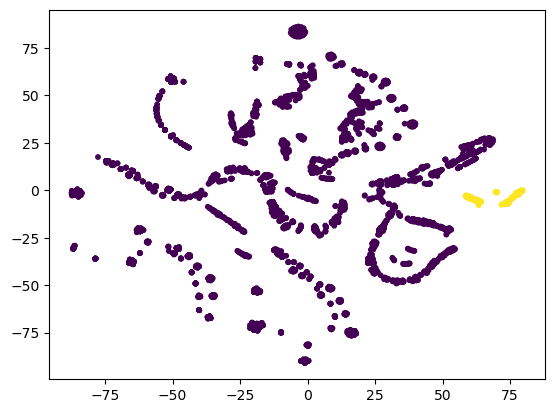

In [19]:
plt.scatter(dftsne[:,0],dftsne[:,1],s=10,c=cluster.labels_)

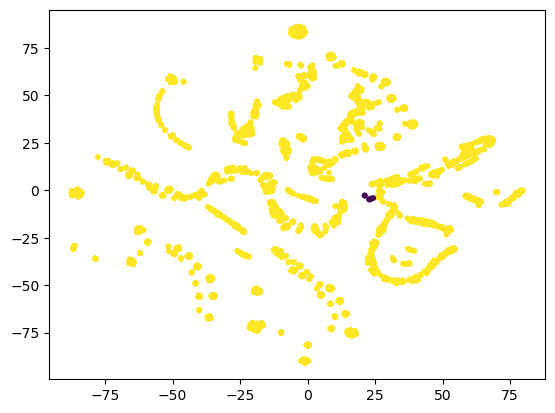

In [20]:
cluster = AgglomerativeClustering(linkage = 'complete').fit(df)
plt.scatter(dftsne[:,0],dftsne[:,1],s=10,c=cluster.labels_)

In [21]:
def plot_dendrogram(model,**kwargs):
    counts = np.zeros(model.children_.shape[0])
    n_samples = len(model.labels_)
    for i,merge in enumerate(model.children_):
        current_count = 0
        for child_idx in merge:
            if child_idx < n_samples:
                current_count+=1
            else:
                current_count += counts[child_idx - n_samples]
            counts[i] = current_count
        linkage_matrix = np.column_stack([model.children_,model.distances_,counts]).astype(float)
        dendrogram(linkage_matrix,**kwargs)

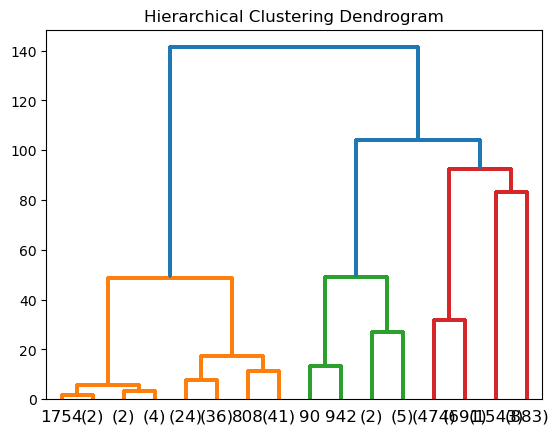

In [24]:
model = AgglomerativeClustering(distance_threshold = 0,n_clusters=None).fit(df)
plt.title('Hierarchical Clustering Dendrogram')
plot_dendrogram(model,truncate_mode='level',p=3)
plt.show()

### Установленно количество листьев равное трем(то есть три связи),заметим,что в первых двух взаимосвязанных группах разница между ними небольшая,когда в последней разница между группами значительна,что свидетельствует о наличии факторов влияющих на эту группу

In [25]:
kmeans = KMeans(n_clusters = 2).fit(df)

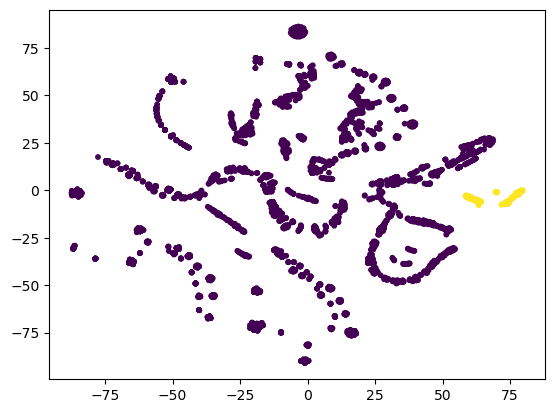

In [26]:
plt.scatter(dftsne[:,0],dftsne[:,1],s=10,c=kmeans.labels_)

In [27]:
inertia = []
N =15
for i in range(2,N):
    kmeans = KMeans(n_clusters = i).fit(df)
    preds= kmeans.predict(df)
    inertia.append(np.sqrt(kmeans.inertia_))

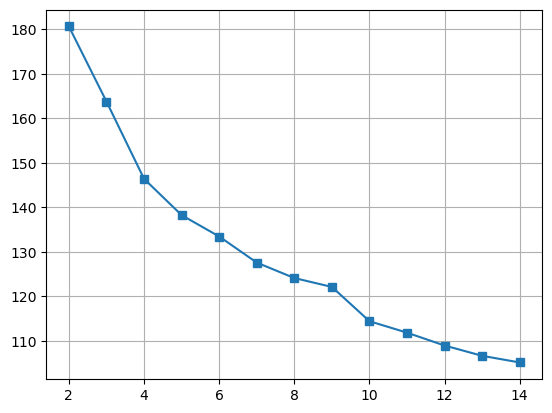

In [29]:
plt.plot(np.arange(2,N),inertia,marker='s')
plt.grid()
plt.show()

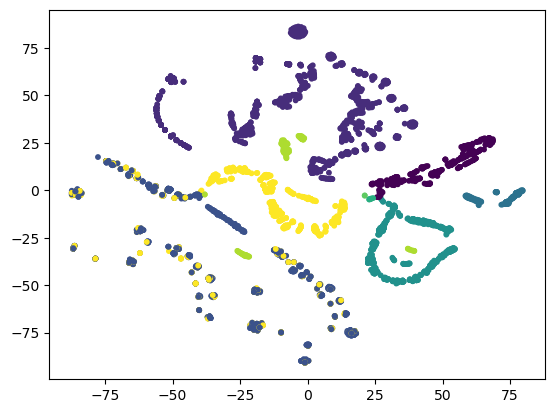

In [30]:
kmeans = KMeans(n_clusters = 9).fit(df)
plt.scatter(dftsne[:,0],dftsne[:,1],s=10,c=kmeans.labels_)

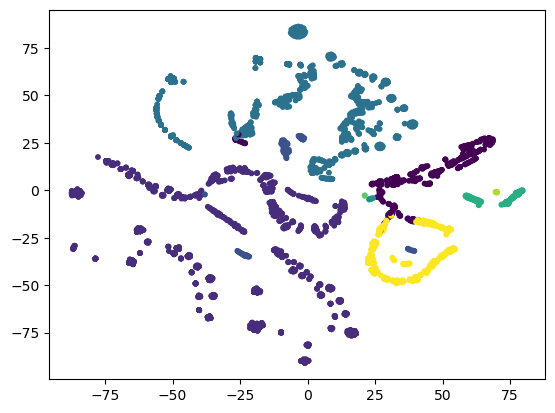

In [31]:
cluster = AgglomerativeClustering(n_clusters = 9).fit(df)
plt.scatter(dftsne[:,0],dftsne[:,1],s=10,c=cluster.labels_)

K=1 skipped. Mean computed from data directly.
K=2 fitted in 8.887 seconds.
K=3 fitted in 9.686 seconds.
K=4 fitted in 12.282 seconds.
K=5 fitted in 14.015 seconds.
K=6 fitted in 16.497 seconds.


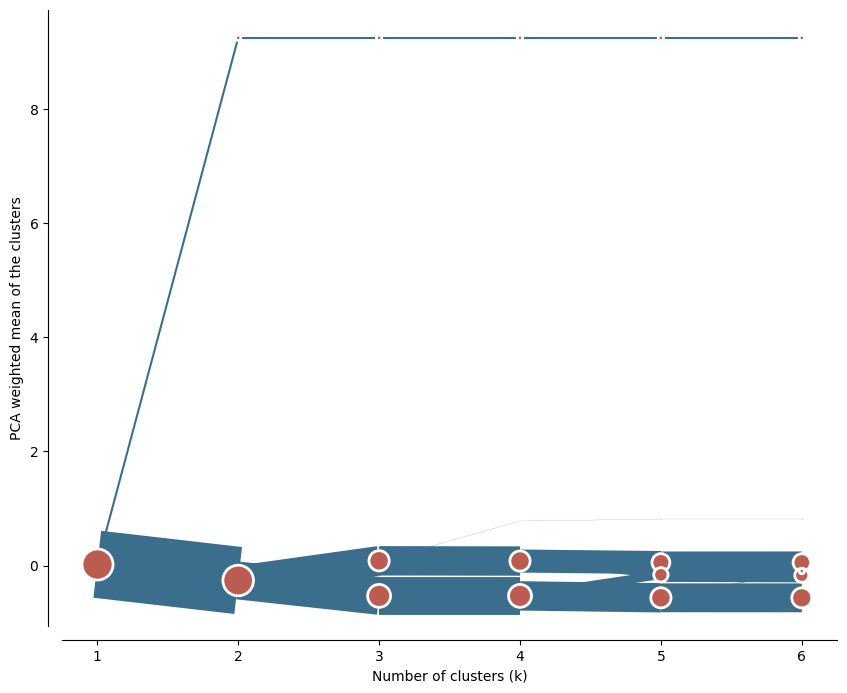

In [44]:
cgram = Clustergram(range(1, 7), n_init=1000, method="kmeans")
cgram.fit(df)
ax = cgram.plot(
figsize= (10, 8), 
    line_style=dict(color=ugg .COLORS[1]), 
    cluster_style={"color": ugg.COLORS [2]} )
ax.yaxis.grid(False)
sns.despine(offset=10)

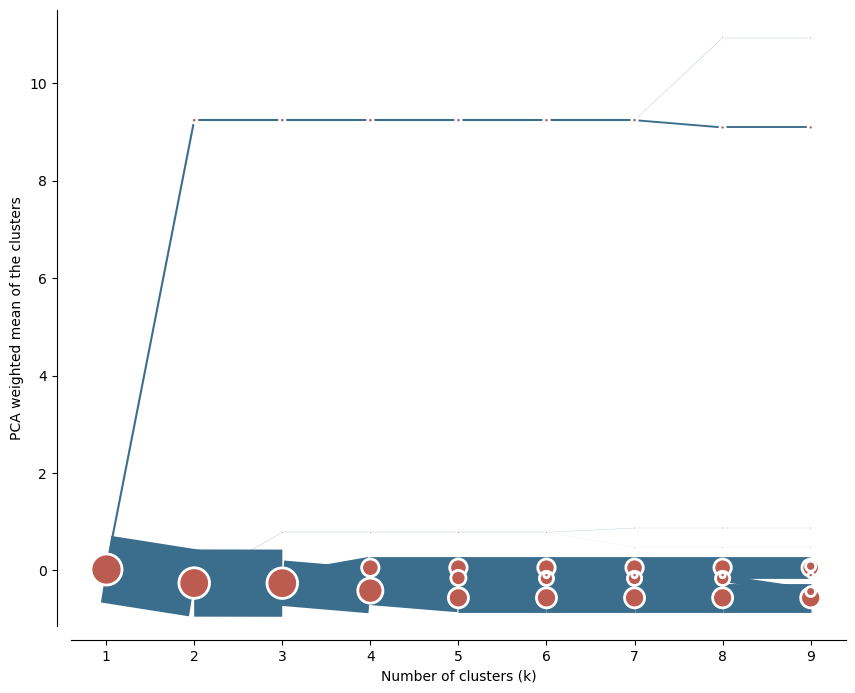

In [40]:
cgram = Clustergram(range(1, 10), method="hierarchical",linkage='ward')
cgram.fit(df)
ax = cgram.plot(
figsize= (10, 8), 
    line_style=dict(color=ugg .COLORS[1]), 
    cluster_style={"color": ugg.COLORS [2]} )
ax.yaxis.grid(False)
sns.despine(offset=10)

### Выводы: вследствии анализа мы получили 4 значимых кластера,два кластера образуются из разбиения большой группы на две подгруппы в течение увеличения кластеров,это значит,что при увелечении количества связей в группе выделяются противоположные направления,третий кластер образуется при увелечении количества разбиения и он связывает первые два кластера,это означает,что между двумя кластерами остается всегда количественная взаимосвязь.Последний кластер имеет малую количественную значимость,но сильное влияние на остальные три кластера,это означает,что в данных есть небольшая группа данных,оказывающих сильное влияние на остальные данные,на нее тоже стоит обратить внимание